# 2019 Machine Learning Project
* Davis Berlind, Alex Marsh, Stella McMullen

## Implementing Elastic Net

In [82]:
#imports
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import ElasticNet, enet_path, lasso_path, Ridge
from sklearn.datasets import make_regression
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error

from itertools import cycle

data = pd.read_csv("/Users/stellamcmullen/Desktop/Compsci 571/Project/Practice Data/Practice_Data.csv")

In [95]:
#naming variables
constant = np.repeat(1, len(data))
X1 = data.DATE
X2 = data.exports
X3 = data.conf
X4 = data.cpi
X5 = data.ip
X6 = data.wage
X6 = data.emp
X7 = data.unemployment
X8 = data.ppi
X9 = data.retail_trade
X10 = data.exchange_rate
X11 = data.MV

X = np.asfortranarray({'constant' : constant, 'X2': X2, 'X3' : X3, 'X4' : X4, 'X5' : X5, 'X6' : X6, 'X7' : X7, 'X8' : X8, 'X9' : X9, 'X10' : X10, 'X11' : X11})

y = data.gdp

In [98]:
#fitting regression
X, y = make_regression(n_features=10, random_state=0)
regr = ElasticNet(random_state=0)
results = regr.fit(X, y)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
#generating predictions (will want to use training and test set in the future)
y_pred = results.predict(X)

In [100]:
# calculating MSSE
mean_squared_error(y, y_pred)

5557.977255915047

In [101]:
# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

Computing regularization path using the elastic net...
Computing regularization path using the lasso...


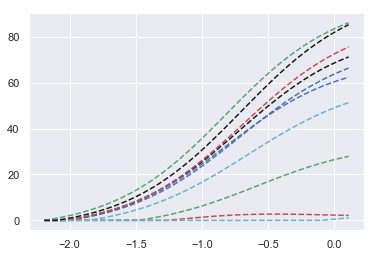

In [103]:
# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)


## Implementing Ridge Regression

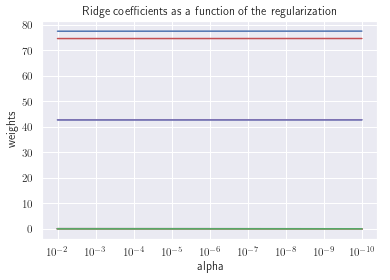

In [105]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()